In [1]:
import json
import pandas as pd
import numpy as np

In [2]:
with open('sample.json', 'r') as file:
    data = json.load(file)

In [3]:
for key,value in data.items():
  print(key)
  print(value)

bitrate
[]
buffer
[]
isLive
True
level
[{'bitrate': 4096, 'id': 4, 'time': 881.7999999523163}]
load
[{'duration': 0.20000004768371582, 'end': 5, 'latency': 867.5999999642372, 'load': 0.20000004768371582, 'name': '', 'start': 0, 'time': 9.199999988079071, 'type': 'manifest'}, {'duration': 0.40000003576278687, 'end': 370, 'id': 4, 'latency': 475.19999998807907, 'load': 0.40000003576278687, 'parsing': 0.800000011920929, 'start': 365, 'time': 882.0999999642372, 'type': 'level'}]
t0
6710.900000035763
url
http://192.168.50.12:8080/hls/test.m3u8
video
[{'time': 33.299999952316284, 'type': 'Media attached'}, {'name': 0, 'time': 882.7999999523163, 'type': 'play'}, {'name': 24000, 'time': 1362.0999999642372, 'type': 'durationchange'}]


In [4]:
tend = 195525.10000002384
bitrate_df = pd.DataFrame(data['bitrate'])
buffer_df = pd.DataFrame(data['buffer'])
level_df = pd.DataFrame(data['level'])
load_df = pd.DataFrame(data['load'])
level_to_bitrate_map = {
  4: 6079,
  3: 2099,
  2: 817,
  1: 450,
  0: 241,
}
level_df.loc[:,'levelBR'] = level_df['id'].map(lambda x : level_to_bitrate_map[x])
# Remember to Duplicate the last column and modify the time to current_time
#! Initial Start Time can be obtained from video map

In [5]:
level_df

,bitrate,id,time,levelBR
0,4096,4,881.8,6079


In [6]:
last_row_buffer_df = buffer_df.iloc[-1].copy()
last_row_buffer_df['time'] = tend
buffer_df = pd.concat([buffer_df, pd.DataFrame([last_row_buffer_df])], ignore_index=True)

last_row_level_df = level_df.iloc[-1].copy()
last_row_level_df['time'] = tend
level_df = pd.concat([level_df, pd.DataFrame([last_row_level_df])], ignore_index=True)
level_df

IndexError: single positional indexer is out-of-bounds

Initial Startup Delay

In [ ]:
buffer_df.head(53)

,buffer,pos,time,stall,time_diff
0,0.0,0.0,0.0,1,0.0
1,3936.0,12075.0,1347.1,0,1347.1
2,3936.0,12075.0,1547.4,0,200.3
3,3911.0,12099.0,1647.0,0,99.6
4,1610.0,14400.0,3947.5,0,2300.5
5,5432.0,14568.0,4114.9,0,167.4
6,53.0,19947.0,9513.8,0,5398.9
7,53.0,19947.0,25915.0,0,16401.2
8,1934.0,20072.0,26116.5,0,201.5
9,44.0,21961.0,28016.6,0,1900.1


In [ ]:
startup_delay = np.diff(buffer_df['time'].values[:2])[0]

Video Resolution

In [ ]:
level_df.loc[1] = [4096, 1, 2000, 450]
level_df.head(5)

,bitrate,id,time,levelBR
0,4096.0,4.0,99.8,6079.0
1,4096.0,1.0,2000.0,450.0
2,448.0,1.0,6020.6,450.0
3,288.0,0.0,26014.2,241.0
4,448.0,1.0,51733.7,450.0


In [ ]:
prod_arr = level_df['levelBR'].values * level_df['time'].values
video_resolution = np.sum(prod_arr)/np.sum(level_df['time'].values)
video_resolution

3757.9952205050226

Variation Rate

In [ ]:
bitrate_diff_arr = np.square(np.diff(level_df['levelBR'].values))
time_diff_arr = np.diff(level_df['time'].values)
video_variation_rate = np.sum(bitrate_diff_arr*time_diff_arr)/level_df['time'].values[-1]

# ! video_variation_rate = level_df['bitrate'].values * level_df['time'].values


In [ ]:
if level_df.shape[1] == 1:
  video_variation_rate = level_df['bitrate'].values[0] * level_df['time'].values[0]
else:
  video_variation_rate = level_df['bitrate'].values * level_df['time'].values

Total Stall Duration

In [ ]:
buffer_df.head(5)

,buffer,pos,time,stall,time_diff
0,0.0,0.0,0.0,1,0.0
1,3936.0,12075.0,1347.1,0,1347.1
2,3936.0,12075.0,1547.4,0,200.3
3,3911.0,12099.0,1647.0,0,99.6
4,1610.0,14400.0,3947.5,0,2300.5


In [ ]:
buffer_df['stall'] = (buffer_df['buffer'] == 0).astype(int)
buffer_df['time_diff'] = buffer_df['time'].diff()
buffer_df.loc[0,'time_diff'] = 0
stall_duration = buffer_df.loc[buffer_df['stall']==1, 'time_diff'].sum()-startup_delay
stall_duration/(tend-startup_delay)

0.033227760096518975

In [ ]:
buffer_df.head(50)

,buffer,pos,time,stall,time_diff
0,0.0,0.0,0.0,1,0.0
1,3936.0,12075.0,1347.1,0,1347.1
2,3936.0,12075.0,1547.4,0,200.3
3,3911.0,12099.0,1647.0,0,99.6
4,1610.0,14400.0,3947.5,0,2300.5
5,5432.0,14568.0,4114.9,0,167.4
6,53.0,19947.0,9513.8,0,5398.9
7,53.0,19947.0,25915.0,0,16401.2
8,1934.0,20072.0,26116.5,0,201.5
9,44.0,21961.0,28016.6,0,1900.1


### Calculating QoE

In [ ]:
def calculate_qoe(initial_startup_delay, bitrate, buffer_length, stall_count, stall_duration, client_id):
    
    if not (bitrate and buffer_length and stall_count and stall_duration):
        return None
    sampling_rate = 2.0
    # Calculate the Video Resolution 
    bitrate_arr = np.array(bitrate)[:,1]
    integrated_resolution = np.trapz(bitrate_arr, dx = sampling_rate)
    video_resolution = 1/(len(bitrate_arr)*sampling_rate)*integrated_resolution
    # Calculate Video Variation Rate
    bitrate_diff_arr = np.square(np.diff(bitrate_arr))
    integrated_variation_rate = np.trapz(bitrate_diff_arr, dx = sampling_rate)
    variation_rate = 1/(len(bitrate_diff_arr)*sampling_rate)*integrated_variation_rate
    # Get Initial Startup Delay
    initial_startup_delay = initial_startup_delay
    # Calculate Video Stalling
    stall_duration_arr = np.array(stall_duration)[:,1]
    stall_diff_arr = np.diff(stall_duration_arr) if len(stall_duration_arr) > 1 else stall_duration
    total_stall_duration = np.sum(stall_diff_arr) 
    
    # TODO: Normalize using Standard Normalization, when collecting data, record it in a csv and then get the mean and variance
    qoe = video_resolution - variation_rate - initial_startup_delay - total_stall_duration
    
    # TODO: Decide on the weight
    w_resolution = 0.2
    w_variation = 0.15
    w_startup_delay = 0.4
    w_stalling = 0.25    
    # Store the results in a DataFrame for easy output
    qoe_df = pd.DataFrame({
        'client_id': [client_id],
        'video_resolution': [video_resolution],
        'variation_rate': [variation_rate],
        'startup_delay': [initial_startup_delay],
        'total_stall_duration': [total_stall_duration],
        'time':[int(bitrate[-1][0])],
        f'qoe_{client_id}': [qoe]
    })    
    
    # ? Record QoE Data
    file_path = 'qoe_data.csv'
    # write_or_append_csv(file_path, qoe_df)
    return qoe_df

In [ ]:
data['load'][0]['duration']

0.30000001192092896

In [ ]:
client_id = 0
qoe_df = pd.DataFrame({
    'client_id': [client_id],
    'video_resolution': [None],
    'variation_rate': [None],
    'startup_delay': [None],
    'avg_stall_duration': [None],
    f'qoe_{client_id}': [None]
})            

# Result Analysis and Plot

In [ ]:
from matplotlib import pyplot
from sklearn.preprocessing import MinMaxScaler
qoe_df = pd.read_csv("qoe_data_hls_resourcevsuser.csv")
cpu = qoe_df['cpu'].copy()
user = qoe_df['user'].copy()
qoe_df.drop(columns=["client_id", "qoe_0", "watch_time", 'cpu', 'user'], inplace=True)
qoe_df.head(3)
qoe_df['video_resolution'].apply()

,video_resolution,variation_rate,startup_delay,avg_stall_duration
0,822.878622,469046.277017,5618.3,0.020947
1,1004.270996,122471.888291,7746.4,0.109389
2,977.166436,68127.359371,5817.4,0.000000


In [ ]:
scaler = MinMaxScaler()
scaled_qoe_df = scaler.fit_transform(qoe_df)
scaled_qoe_df = pd.DataFrame(scaled_qoe_df, columns=qoe_df.columns)
scaled_qoe_df['cpu'] = cpu
scaled_qoe_df['user'] = user
scaled_qoe_df['qoe'] = scaled_qoe_df['video_resolution'] - 0.25*scaled_qoe_df['variation_rate'] - 0.25*scaled_qoe_df['startup_delay'] - 0.25*scaled_qoe_df['avg_stall_duration']
scaled_qoe_df.head(3)


,video_resolution,variation_rate,startup_delay,avg_stall_duration,cpu,user,qoe
0,0.731448,0.842370,0.725279,0.020947,2500,1,0.334299
1,0.892685,0.219950,1.000000,0.109389,2500,1,0.560351
2,0.868592,0.122351,0.750981,0.000000,2500,1,0.650259


<Axes: title={'center': 'QoE vs CPU by User'}, xlabel='cpu', ylabel='qoe'>

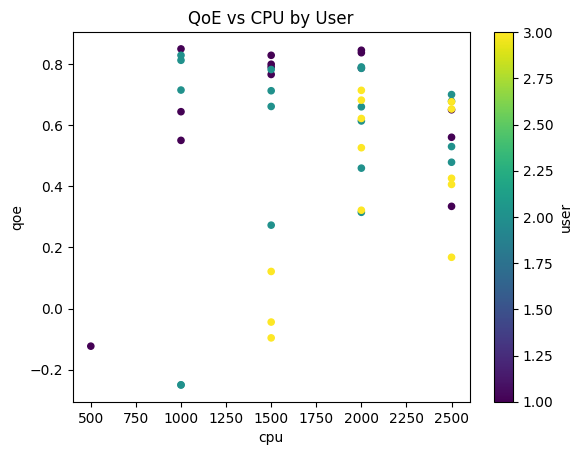

In [ ]:
scaled_qoe_df.plot.scatter(x='cpu', 
                           y='qoe', 
                           c='user', 
                           colormap='viridis',  # Change the colormap if desired
                           colorbar=True, 
                           title='QoE vs CPU by User')

# CPU vs Detection Speed

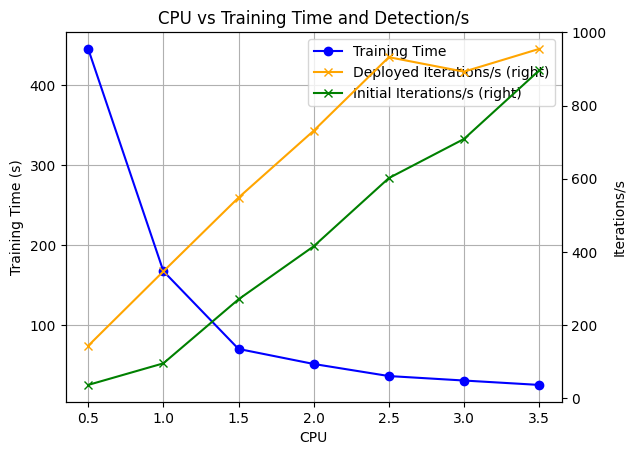

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
cpu_df = pd.read_csv('experiment_data/cpu_vs_detection_speed.csv')
ax = cpu_df.plot(x='CPU', y='Training Time', kind='line', color='blue', marker='o')
ax.set_ylabel('Training Time (s)')
ax2 = cpu_df.plot(x='CPU', y='Deployed Iterations/s', kind='line', color='orange', secondary_y=True, ax=ax, marker='x')
ax2.set_ylabel('Iterations/s')
ax3 = cpu_df.plot(x='CPU', y='Initial Iterations/s', kind='line', marker='x', color='green', secondary_y=True, ax=ax)
ax.set_title('CPU vs Training Time and Detection/s')
ax.grid(linestyle='-')
plt.show()


NameError: name 'df' is not defined